In [1]:
import sys
sys.path.append('/home/painchess/projects_clean/Simulations')
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
from simulation import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [4]:
params = {'legend.fontsize': 13,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

# Snapshot cadence and dynamical time 

## Dynamical time vs z 

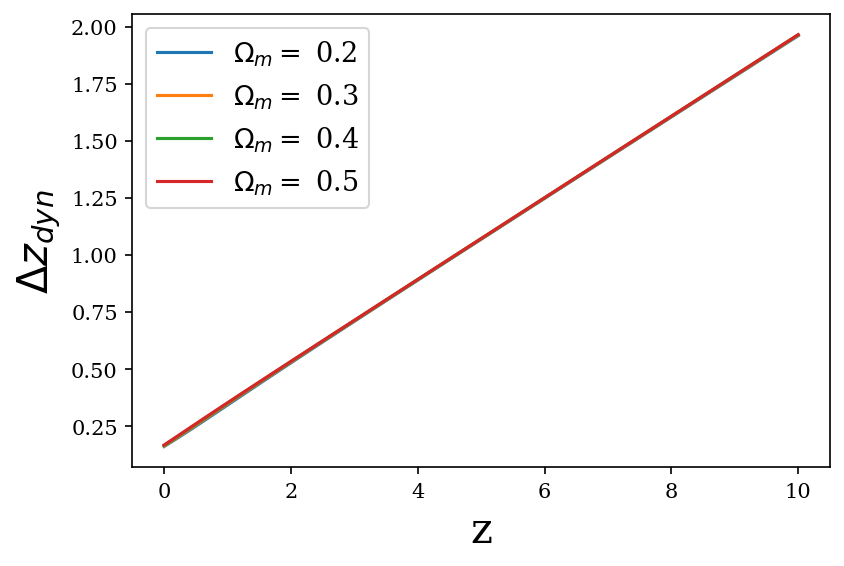

In [5]:
reds = np.linspace(0, 10, 100)

omegas = [0.2, 0.3, 0.4, 0.5]
for omg in omegas:
    delz = []
    for i in range(100):
        zs, dz = get_zlastdyn(reds[i], h=0.7, om=omg, zbins=5)
        delz.append(zs[0]-zs[-1])
    plt.plot(reds, delz, label=r'$\Omega_m =$ {}'.format(omg))
plt.xlabel('z', size=20)
plt.ylabel(r'$\Delta z_{dyn}$', size=20)
plt.legend()

In [6]:
fbase = '/home/painchess/sims/'
z_bP = np.loadtxt(fbase+'redshifts/bolshoiP.txt')
z_bW = np.loadtxt(fbase+'redshifts/bolshoiW.txt')
z_Il = np.loadtxt(fbase+'redshifts/Illustris.txt')
z_MxSy = np.loadtxt(fbase+'redshifts/M03S08.txt')[1:]
z_new = np.loadtxt(fbase+'redshifts/m3s8c1.txt')[::-1]
z_mxsy = np.loadtxt(fbase+'redshifts/mxsy_reds.txt')[::-1]


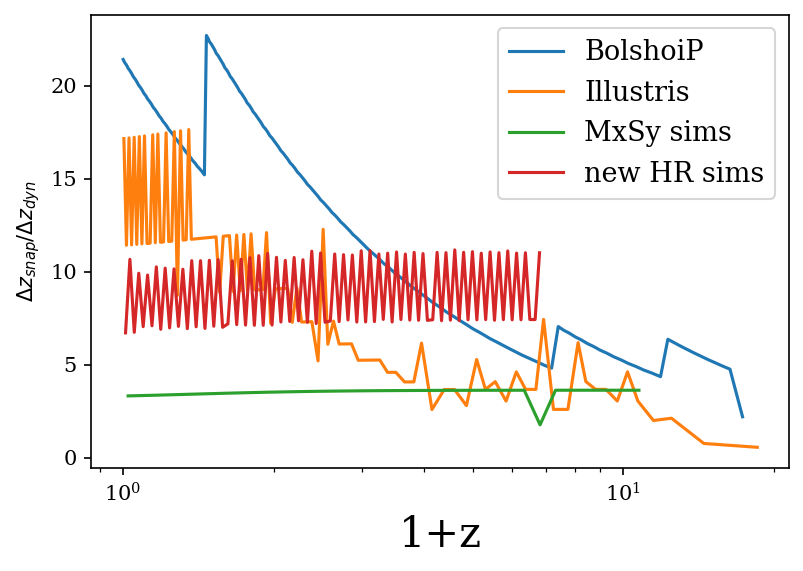

In [7]:
zss = [z_bP, z_Il, z_MxSy, z_new]
sims = ['BolshoiP', 'Illustris', 'MxSy sims', 'new HR sims']
#fig, axs = plt.subplots(2,1, figsize=[7, 14])
for i in range(len(zss)):
    el = zss[i]
    dzdyn = []
    for red in el: 
        zs, dz = get_zlastdyn(red, h=0.7, om=0.3, zbins=5)
        dzdyn.append(zs[-1]-zs[0])
    dzdyn = np.array(dzdyn)
    
    plt.plot(1+np.abs(0.5*(el[:-1]+el[1:])), np.abs(dzdyn[:-1]/(el[:-1]-el[1:])), color='C{}'.format(i), label=r'{}'.format(sims[i]))

plt.legend()
plt.xscale('log')
plt.xlabel('1+z', size=20)

#axs[1].set_xlim(0, 15)
plt.ylabel(r'$\Delta z_{snap}/\Delta z_{dyn}$')

plt.savefig('./figs/cadence_comparison.png', dpi=600, facecolor='white', bbox_inches='tight', transparent=True)

In [9]:
amin, amax = 1/(1+6), 1
a_s = np.logspace(np.log10(amin), np.log10(amax), 96, dtype=np.float64)
z_s = 1/a_s -1

Text(0, 0.5, '$\\Delta z_{snap}/\\Delta z_{dyn}$')

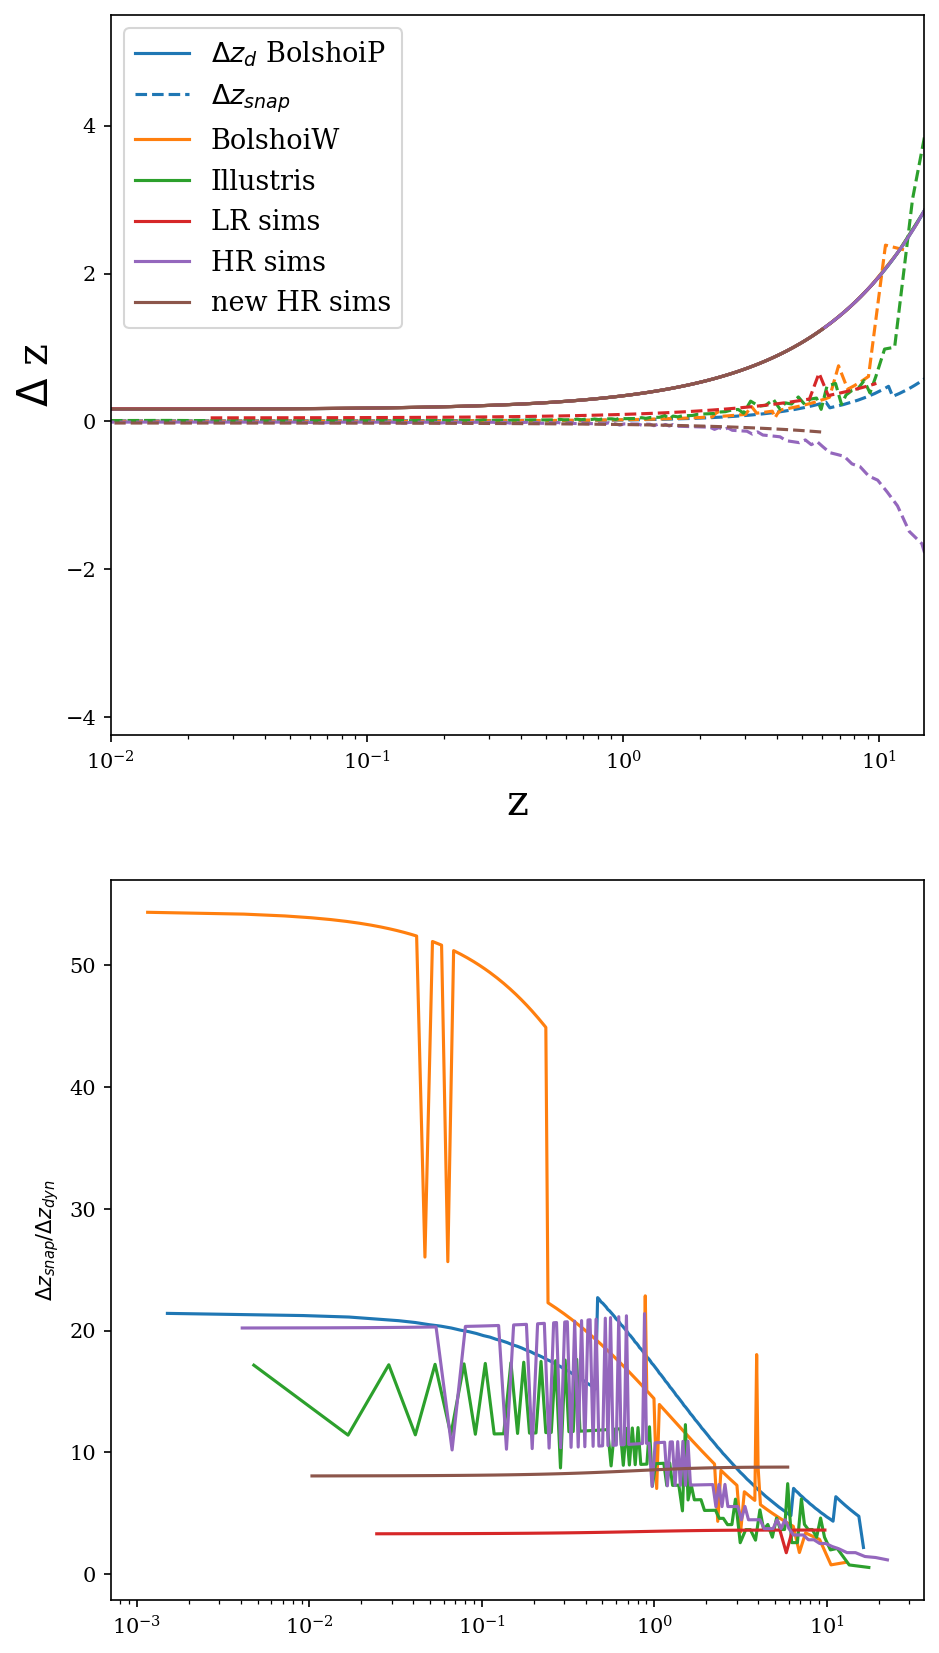

In [10]:
zss = [z_bP, z_bW, z_Il, z_MxSy, z_mxsy, z_s]
sims = ['BolshoiP', 'BolshoiW', 'Illustris', 'LR sims', 'HR sims', 'new HR sims']
fig, axs = plt.subplots(2,1, figsize=[7, 14])
for i in range(len(zss)):
    el = zss[i]
    dzdyn = []
    for red in el: 
        zs, dz = get_zlastdyn(red, h=0.7, om=0.3, zbins=5)
        dzdyn.append(zs[-1]-zs[0])
    dzdyn = np.array(dzdyn)
    if i ==0:
        axs[0].plot(el, -dzdyn, '-', color='C{}'.format(i), label=r'$\Delta z_d$ {}'.format(sims[i]))
        axs[0].plot(np.abs(0.5*(el[:-1]+el[1:])), -el[:-1]+el[1:], '--', color='C{}'.format(i), label=r'$\Delta z_{snap}$')
    else:
        axs[0].plot(el, -dzdyn, '-', color='C{}'.format(i), label=r'{}'.format(sims[i]))
        axs[0].plot(np.abs(0.5*(el[:-1]+el[1:])), -el[:-1]+el[1:], '--', color='C{}'.format(i))

    axs[1].plot(np.abs(0.5*(el[:-1]+el[1:])), np.abs(dzdyn[:-1]/(el[:-1]-el[1:])), color='C{}'.format(i))
axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_xlabel('z', size=20)
axs[0].set_ylabel(r'$\Delta$ z', size=20)
axs[1].set_xscale('log')
axs[0].set_xlim(1e-2, 15)
#axs[1].set_xlim(0, 15)
axs[1].set_ylabel(r'$\Delta z_{snap}/\Delta z_{dyn}$')




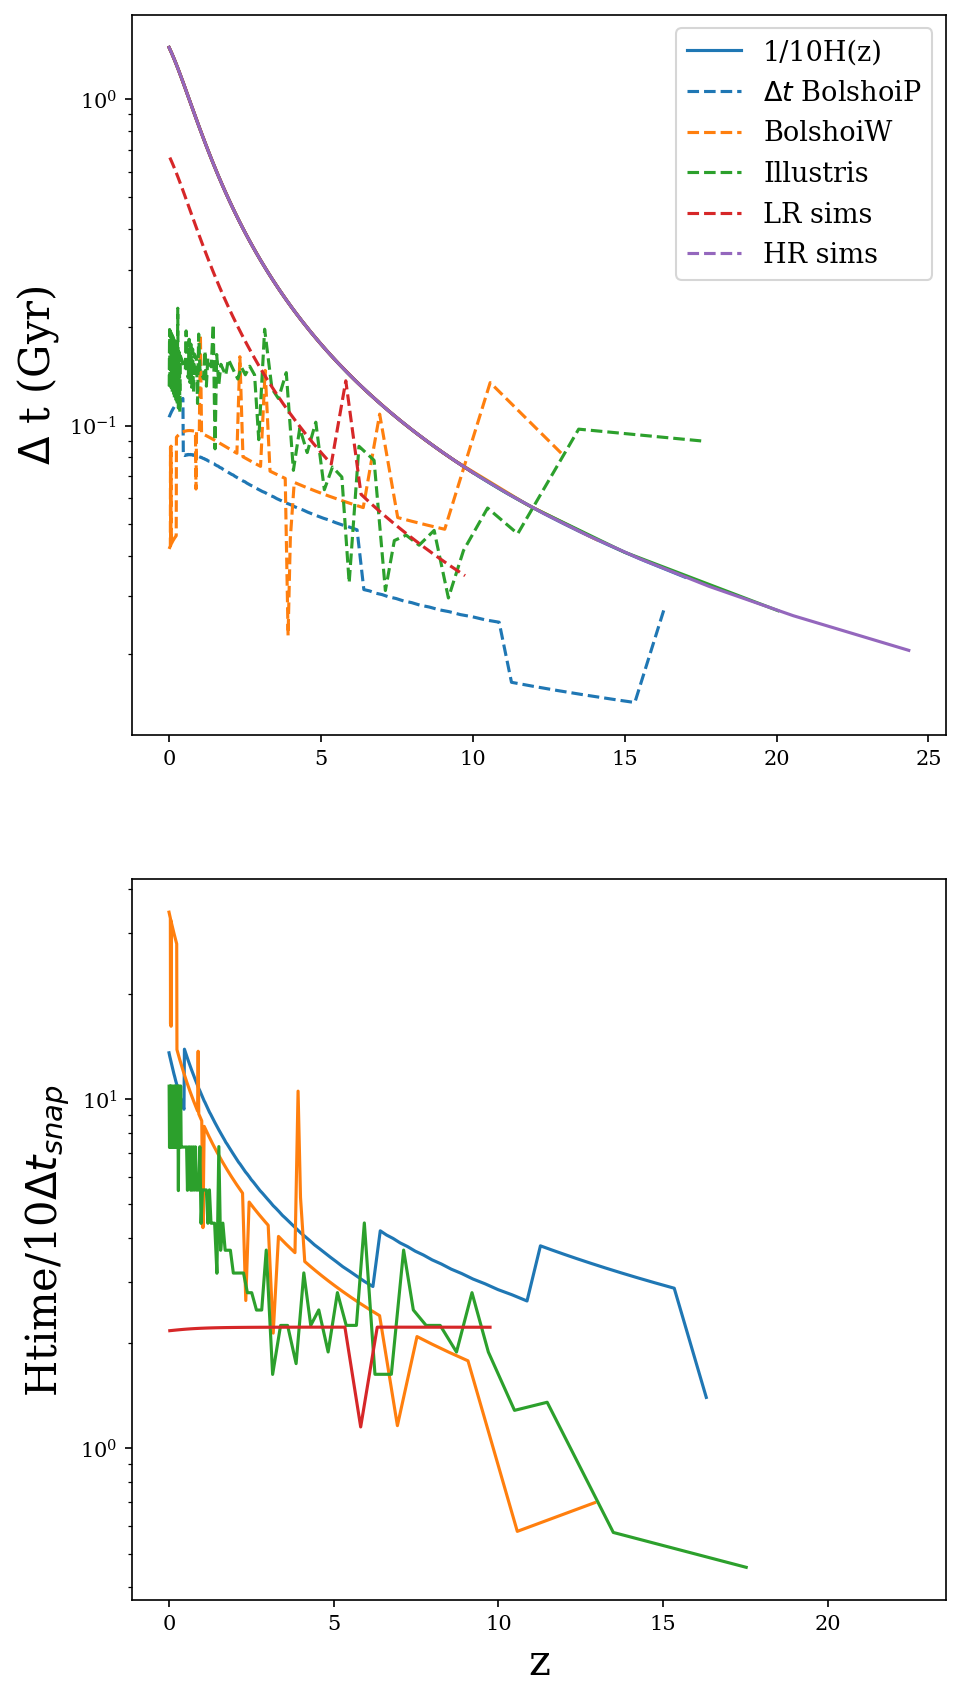

In [13]:
zss = [z_bP, z_bW, z_Il, z_MxSy, z_mxsy]
sims = ['BolshoiP', 'BolshoiW', 'Illustris', 'LR sims', 'HR sims']
fig, axs = plt.subplots(2,1, figsize=[7, 14])
om = 0.3
for i in range(len(zss)):
    el = zss[i]
    #dzdyn = []
    cosmo = LambdaCDM(H0=100*h, Om0=om, Ode0=1-om)
    times = cosmo.age(el).value
    htimes = 1.44/hubble_ratio(el, omega_m0=om, omega_l0=1-om)
    dts = times[:-1]-times[1:]
        #zs, dz = get_zlastdyn(red, h=0.7, om=0.3, zbins=5)
        #dzdyn.append(zs[-1]-zs[0])
    if i ==0:
        axs[0].plot(el, htimes, '-', color='C{}'.format(i), label='1/10H(z)' )
        axs[0].plot(0.5*(el[:-1]+el[1:]), dts, '--', color='C{}'.format(i), label=r'$\Delta t$ {}'.format(sims[i]))
    else:
        axs[0].plot(el, htimes, '-', color='C{}'.format(i))
        axs[0].plot(0.5*(el[:-1]+el[1:]), dts, '--', color='C{}'.format(i), label=r'{}'.format(sims[i]))

    axs[1].plot(0.5*(el[:-1]+el[1:]), htimes[:-1]/dts, color='C{}'.format(i))
axs[0].legend()
axs[1].set_xlabel('z', size=20)
axs[0].set_ylabel(r'$\Delta$ t (Gyr)', size=20)
axs[0].set_yscale('log')
#axs[0].set_xlim(0, 15)
#axs[1].set_xlim(0, 15)
axs[1].set_ylabel(r'Htime/10$\Delta t_{snap}$', size=20)
axs[1].set_yscale('log')


